In [0]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [0]:
from keras.initializers import RandomNormal
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


Text(0.5, 1.0, '5')

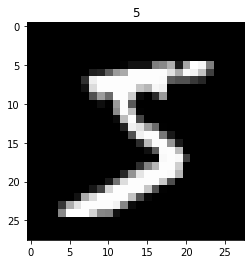

In [0]:
(XX_train, yy_train), (XX_test, yy_test) = mnist.load_data()
plt.imshow(XX_train[0], cmap='gray')
plt.title(yy_train[0])

<h2> 1. CNN + Dropout + AdadeltaOptimizer </h2>






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/12





60000/60000 [==============================] - 136s 2ms/step - loss: 0.2664 - acc: 0.9167 - val_loss: 0.0602 - val_acc: 0.9805
Epoch 2/12
60000/60000 [==============================] - 135s 2ms/step - loss: 0.0860 - acc: 0.9744 - val_loss: 0.0408 - val_acc: 0.9859
Epoch 3/12
60000/60000 [==============================] - 135s 2ms/step - loss: 0.0665 - acc: 0.9808 - val_loss: 0.0345 - val_acc: 0.9879
Epoch 4/12
60000/60000 [==============================] - 134s 2ms/step - loss: 0.0543 - acc: 0.9841 - val_loss: 0.0336 - val_acc: 0.9892
Epoch 5/12
60000/60000 [==============================] - 134s 2ms/step - loss: 0.0466 - acc: 0.9859 - val_loss: 0.0326 - val_acc: 0.9893
Epoch 6/12
60000/60000 [============

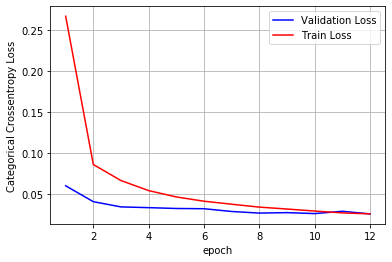

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,\
              optimizer=keras.optimizers.Adadelta(),\
              metrics=['accuracy'])
history=model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> 2. CNN + Batch Normalization +Dropout + AdamOptimizer </h2>

In [0]:
input_shape

(28, 28, 1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 652s 11ms/step - loss: 1.4910 - acc: 0.4760 - val_loss: 0.2137 - val_acc: 0.9322
Epoch 2/12
60000/60000 [==============================] - 648s 11ms/step - loss: 0.3576 - acc: 0.8902 - val_loss: 0.1047 - val_acc: 0.9694
Epoch 3/12
60000/60000 [==============================] - 647s 11ms/step - loss: 0.1948 - acc: 0.9431 - val_loss: 0.0763 - val_acc: 0.9782
Epoch 4/12
60000/60000 [==============================] - 644s 11ms/step - loss: 0.1412 - acc: 0.9597 - val_loss: 0.0518 - val_acc: 0.9850
Epoch 5/12
60000/60000 [==============================] - 649s 11ms/step - loss: 0.1134 - acc: 0.9682 - val_loss: 0.0444 - val_acc: 0.9868
Epoch 6/12
60000/60000 [==============================] - 664s 11ms/step - loss: 0.0959 - acc: 0.9733 - val_loss: 0.0454 - val_acc: 0.9871
Epoch 7/12
60000/60000 [==============================] - 648s 11ms/step - loss: 0.0817 - acc: 0.9772 - val_loss: 0.

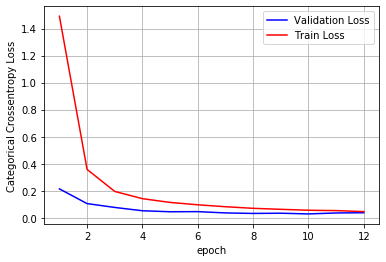

In [0]:
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(5,5),activation='relu',input_shape=(28,28,1),\
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None),padding='same'))
model2.add(BatchNormalization())
model2.add(Conv2D(64, (5,5), activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None),padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(5,5),padding='same'))
model2.add(Dropout(0.25))

model2.add(Conv2D(72, (5,5), activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None),padding='same'))
model2.add(BatchNormalization())
model2.add(Conv2D(84, (5,5), activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None),padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(5,5),padding='same'))
model2.add(Dropout(0.25))

model2.add(Conv2D(97, (5,5), activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None),padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(5,5),padding='same'))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))

model2.add(Dense(num_classes, activation='softmax'))

model2.compile(loss=keras.losses.categorical_crossentropy,\
              optimizer=keras.optimizers.Adam(),\
              metrics=['accuracy'])
history=model2.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> 3. CNN + Batch Normalization +Dropout+ Padding + stride + AdamOptimizer </h2>

In [0]:
from keras.initializers import TruncatedNormal,VarianceScaling, glorot_normal,he_uniform,lecun_uniform

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 72s 1ms/step - loss: 10.6630 - acc: 0.1321 - val_loss: 14.1663 - val_acc: 0.1135
Epoch 2/12
60000/60000 [==============================] - 68s 1ms/step - loss: 10.6859 - acc: 0.1588 - val_loss: 14.4902 - val_acc: 0.1010
Epoch 3/12
60000/60000 [==============================] - 67s 1ms/step - loss: 14.5260 - acc: 0.0985 - val_loss: 14.5482 - val_acc: 0.0974
Epoch 4/12
60000/60000 [==============================] - 67s 1ms/step - loss: 14.5367 - acc: 0.0981 - val_loss: 14.5482 - val_acc: 0.0974
Epoch 5/12
60000/60000 [==============================] - 67s 1ms/step - loss: 14.5354 - acc: 0.0980 - val_loss: 14.5482 - val_acc: 0.0974
Epoch 6/12
60000/60000 [==============================] - 67s 1ms/step - loss: 14.5365 - acc: 0.0974 - val_loss: 14.5482 - val_acc: 0.0974
Epoch 7/12
60000/60000 [==============================] - 67s 1ms/step - loss: 14.5344 - acc: 0.0976 - val_loss: 14.

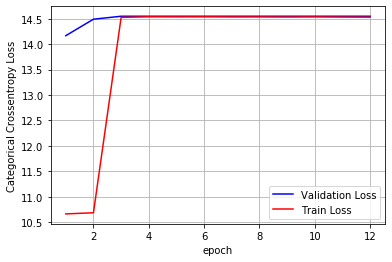

In [0]:
model3 = Sequential()
model3.add(Conv2D(32, kernel_size=(7, 7),activation='relu',input_shape=input_shape,\
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None),padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(64, (7, 7), activation='selu',kernel_initializer=TruncatedNormal(seed=None),padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(72, (7, 7), activation='exponential',kernel_initializer=glorot_normal(seed=None),padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(7,7),strides=(1,1),padding='same'))
model3.add(Dropout(0.25))

model3.add(Conv2D(84, (7, 7), activation='tanh',kernel_initializer=VarianceScaling(scale=1.0, mode='fan_avg', distribution='normal', seed=None),padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(92, (7, 7), activation='exponential',kernel_initializer=lecun_uniform(seed=None),padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(102, (7, 7), activation='sigmoid',kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None),padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(7,7),strides=(1,1),padding='same'))
model3.add(Dropout(0.25))

model3.add(Conv2D(114, (7, 7), activation='hard_sigmoid',kernel_initializer=he_uniform(seed=None),padding='same'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))
model3.add(MaxPooling2D(pool_size=(7,7),strides=(1,1),padding='same'))
model3.add(Dropout(0.25))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5))

model3.add(Dense(num_classes, activation='softmax'))

model3.compile(loss=keras.losses.categorical_crossentropy,\
              optimizer=keras.optimizers.Adam(),\
              metrics=['accuracy'])
history=model3.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
score = model3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
nb_epoch=12
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 75s 1ms/step - loss: 14.4344 - acc: 0.1037 - val_loss: 13.4983 - val_acc: 0.1166
Epoch 2/12
60000/60000 [==============================] - 71s 1ms/step - loss: 14.4625 - acc: 0.1026 - val_loss: 14.2887 - val_acc: 0.1135
Epoch 3/12
60000/60000 [==============================] - 71s 1ms/step - loss: 14.0762 - acc: 0.1265 - val_loss: 14.2887 - val_acc: 0.1135
Epoch 4/12
60000/60000 [==============================] - 71s 1ms/step - loss: 12.7713 - acc: 0.2074 - val_loss: 14.2887 - val_acc: 0.1135
Epoch 5/12
60000/60000 [==============================] - 71s 1ms/step - loss: 12.3478 - acc: 0.2333 - val_loss: 14.2737 - val_acc: 0.1143
Epoch 6/12
60000/60000 [==============================] - 71s 1ms/step - loss: 11.0838 - acc: 0.3097 - val_loss: 14.1368 - val_acc: 0.1227
Epoch 7/12
60000/60000 [==============================] - 71s 1ms/step - loss: 9.2714 - acc: 0.3554 - val_loss: 14.1

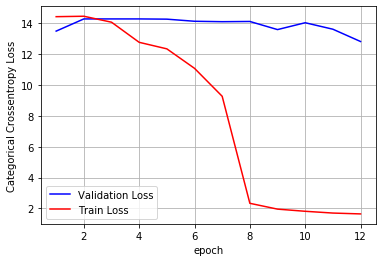

In [0]:
model33 = Sequential()
model33.add(Conv2D(32, kernel_size=(7, 7),activation='relu',input_shape=input_shape,\
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None),padding='same'))
model33.add(BatchNormalization())
model33.add(Dropout(0.25))
model33.add(Conv2D(64, (7, 7), activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None),padding='same'))
model33.add(BatchNormalization())
model33.add(Dropout(0.25))
model33.add(Conv2D(72, (7, 7), activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None),padding='same'))
model33.add(BatchNormalization())
model33.add(Dropout(0.25))
model33.add(MaxPooling2D(pool_size=(7,7),strides=(1,1),padding='same'))
model33.add(Dropout(0.25))

model33.add(Conv2D(84, (7, 7), activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None),padding='same'))
model33.add(BatchNormalization())
model33.add(Dropout(0.25))
model33.add(Conv2D(92, (7, 7), activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None),padding='same'))
model33.add(BatchNormalization())
model33.add(Dropout(0.25))
model33.add(Conv2D(102, (7, 7), activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None),padding='same'))
model33.add(BatchNormalization())
model33.add(Dropout(0.25))
model33.add(MaxPooling2D(pool_size=(7,7),strides=(1,1),padding='same'))
model33.add(Dropout(0.25))

model33.add(Conv2D(114, (7, 7), activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None),padding='same'))
model33.add(BatchNormalization())
model33.add(Dropout(0.5))
model33.add(MaxPooling2D(pool_size=(7,7),strides=(1,1),padding='same'))
model33.add(Dropout(0.25))
model33.add(Flatten())
model33.add(Dense(128, activation='relu'))
model33.add(Dropout(0.5))

model33.add(Dense(num_classes, activation='softmax'))

model33.compile(loss=keras.losses.categorical_crossentropy,\
              optimizer=keras.optimizers.Adam(),\
              metrics=['accuracy'])
history=model33.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
score = model33.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
nb_epoch=12
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# Conclusion:

In [0]:
from prettytable import PrettyTable
x=PrettyTable()
x = PrettyTable(["Models with number of kernels", "accuracy %", "score %"])
x.add_row(['2','0.9915','0.02594'])
x.add_row(['5','0.9898','0.0374'])
x.add_row(['7','0.2018','12.824'])
x.add_row(['7(with different activations and initializers)','0.0974','14.5487'])
print(x)

+------------------------------------------------+------------+---------+
|         Models with number of kernels          | accuracy % | score % |
+------------------------------------------------+------------+---------+
|                       2                        |   0.9915   | 0.02594 |
|                       5                        |   0.9898   |  0.0374 |
|                       7                        |   0.2018   |  12.824 |
| 7(with different activations and initializers) |   0.0974   | 14.5487 |
+------------------------------------------------+------------+---------+
